# 準備


## TensorFlow, Kerasのバージョンを変更する

*   TensorFlow==1.15.4
*   TensorFlow_gpu==1.13.1
*   keras==2.2.4

In [1]:
# 実行後、ランタイムを再起動する
# 再起動後はこのセルを実行しなくていい
!pip uninstall tensorflow -y | tail -n 1
!pip install tensorflow==1.15.4 | tail -n 1

!pip install tensorflow_gpu==1.13.1 | tail -n 1

!pip uninstall keras -y | tail -n 1
!pip install keras==2.2.4 | tail -n 1

  Successfully uninstalled tensorflow-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.4 which is incompatible.
jaxlib 0.3.2+cuda11.cudnn805 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
jax 0.3.4 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.4 requires tensorboard<1.16.0,>=1.15.0, but you have tensorboard 1.13.1 which is incompatible.
tensorflow 1.15.4 requires tensorflow-estimator==1.15.1, but you have tensorflow-estimator 1.13.0 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.4 which is incompatible.
  Successfully uninstalled keras-2.8.0


**ランタイムを再起動！！**

## CUDAのバージョンを変更
https://stackoverflow.com/questions/62584399/google-colab-gpus-tensorflow-1-x

In [1]:
# 現在のCUDAのバージョンをアンインストール
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'


In [2]:
# CUDA 10.0をダウンロード・インストール
!wget  --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb -Y
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-10-0

--2022-04-05 09:47:25--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.39.144
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2940 (2.9K) [application/x-deb]
Saving to: ‘cuda-repo-ubuntu1804_10.0.130-1_amd64.deb’

cuda-repo-ubuntu180 100%[===================>]   2.87K  --.-KB/s    in 0s      

2022-04-05 09:47:25 (152 MB/s) - ‘cuda-repo-ubuntu1804_10.0.130-1_amd64.deb’ saved [2940/2940]

dpkg: error: cannot access archive '-Y': No such file or directory
Executing: /tmp/apt-key-gpghome.Uas4lpd6eb/gpg.1.sh --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
gpg: requesting key from 'https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub'
gpg

## インポート

In [3]:
# math libraries
import numpy as np
# ml libraries
import tensorflow as tf
#import tensorflow.compat.v1 as tf
import keras
from keras import layers, models, optimizers
from keras import backend as K
from keras.utils import to_categorical
from keras.datasets import mnist, cifar10
from keras import initializers, layers
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Lambda, Concatenate, Multiply
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
from keras.datasets import mnist, cifar10, fashion_mnist
from keras import initializers, regularizers, constraints
from keras.utils import conv_utils
from keras.layers import InputSpec
from keras.utils.conv_utils import conv_output_length
from keras.backend import *
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import math_ops
# visualization libraries
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [4]:
import warnings
import logging
import os

# warningを無視する
def ignore_tf_warnings():
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=Warning)
    tf.get_logger().setLevel('INFO')
    tf.autograph.set_verbosity(0)
    tf.get_logger().setLevel(logging.ERROR)

In [5]:
# kerasの初期値の設定
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42)

## データのロードと前処理

In [6]:
# データをロードする関数
# dataset: データセットの名前('mnist', 'f_mnist', 'cifar10')
def load_dataset(dataset, onehot=True):
    
    if dataset == 'mnist':
        width, height, channels = 28, 28, 1
        # load MNIST data
        (X_train, y_train), (X_test, y_test) = mnist.load_data()

        # rescale -1 to 1
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_test = (X_test.astype(np.float32) - 127.5) / 127.5

        X_train = np.expand_dims(X_train, axis=3)
        X_test = np.expand_dims(X_test, axis=3)

        # ラベルデータを1-of-K表現にする
        if(onehot):
            y_train = tf.keras.utils.to_categorical(y_train)
            y_test = tf.keras.utils.to_categorical(y_test)

    if dataset == 'f_mnist':
        width, height, channels = 28, 28, 1
        # load MNIST data
        (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

        # rescale -1 to 1
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_test = (X_test.astype(np.float32) - 127.5) / 127.5
        
        X_train = np.expand_dims(X_train, axis=3)
        X_test = np.expand_dims(X_test, axis=3)

        # ラベルデータを1-of-K表現にする
        if(onehot):
            y_train = tf.keras.utils.to_categorical(y_train)
            y_test = tf.keras.utils.to_categorical(y_test)
        
    if dataset == 'cifar10':
        width, height, channels = 32, 32, 3
        # load CIFAR10 data
        (X_train, y_train), (X_test, y_test) = cifar10.load_data()

        # rescale -1 to 1
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_test = (X_test.astype(np.float32) - 127.5) / 127.5

        # ラベルデータを1-of-K表現にする
        if(onehot):
            y_train = tf.keras.utils.to_categorical(y_train)
            y_test = tf.keras.utils.to_categorical(y_test)

    # defining input dims
    img_rows = width
    img_cols = height
    channels = channels
    img_shape = [img_rows, img_cols, channels]
    
    return X_train, y_train, X_test, y_test, img_shape

In [7]:
# データセットをロードする
dataset_title = 'mnist'
if(dataset_title == "mnist" or dataset_title == 'f_mnist'):
    X_train, y_train, X_test, y_test, shape = load_dataset(dataset_title, True)
elif(dataset_title == 'cifar10'):
    X_train, y_train, X_test, y_test, shape = load_dataset('cifar10', True)

11493376/11490434 [==============================] - 2s 0us/step


# モデル構築
## カプセルレイヤーの定義
https://github.com/brjathu/deepcaps

In [8]:
#own_batch_dot = batch_dot  # force standard implementation 

# import of batch_dot operation from TF 1.13
# https://github.com/tensorflow/tensorflow/blob/v1.13.1/tensorflow/python/keras/backend.py

def own_batch_dot(x, y, axes=None):
  """Batchwise dot product.
  `batch_dot` is used to compute dot product of `x` and `y` when
  `x` and `y` are data in batch, i.e. in a shape of
  `(batch_size, :)`.
  `batch_dot` results in a tensor or variable with less dimensions
  than the input. If the number of dimensions is reduced to 1,
  we use `expand_dims` to make sure that ndim is at least 2.
  Arguments:
      x: Keras tensor or variable with `ndim >= 2`.
      y: Keras tensor or variable with `ndim >= 2`.
      axes: list of (or single) int with target dimensions.
          The lengths of `axes[0]` and `axes[1]` should be the same.
  Returns:
      A tensor with shape equal to the concatenation of `x`'s shape
      (less the dimension that was summed over) and `y`'s shape
      (less the batch dimension and the dimension that was summed over).
      If the final rank is 1, we reshape it to `(batch_size, 1)`.
  Examples:
      Assume `x = [[1, 2], [3, 4]]` and `y = [[5, 6], [7, 8]]`
      `batch_dot(x, y, axes=1) = [[17, 53]]` which is the main diagonal
      of `x.dot(y.T)`, although we never have to calculate the off-diagonal
      elements.
      Shape inference:
      Let `x`'s shape be `(100, 20)` and `y`'s shape be `(100, 30, 20)`.
      If `axes` is (1, 2), to find the output shape of resultant tensor,
          loop through each dimension in `x`'s shape and `y`'s shape:
      * `x.shape[0]` : 100 : append to output shape
      * `x.shape[1]` : 20 : do not append to output shape,
          dimension 1 of `x` has been summed over. (`dot_axes[0]` = 1)
      * `y.shape[0]` : 100 : do not append to output shape,
          always ignore first dimension of `y`
      * `y.shape[1]` : 30 : append to output shape
      * `y.shape[2]` : 20 : do not append to output shape,
          dimension 2 of `y` has been summed over. (`dot_axes[1]` = 2)
      `output_shape` = `(100, 30)`
  ```python
      >>> x_batch = K.ones(shape=(32, 20, 1))
      >>> y_batch = K.ones(shape=(32, 30, 20))
      >>> xy_batch_dot = K.batch_dot(x_batch, y_batch, axes=[1, 2])
      >>> K.int_shape(xy_batch_dot)
      (32, 1, 30)
  ```
  """
  if isinstance(axes, int):
    axes = (axes, axes)
  x_ndim = ndim(x)
  y_ndim = ndim(y)
  if axes is None:
    # behaves like tf.batch_matmul as default
    axes = [x_ndim - 1, y_ndim - 2]
  if x_ndim > y_ndim:
    diff = x_ndim - y_ndim
    y = array_ops.reshape(y,
                          array_ops.concat(
                              [array_ops.shape(y), [1] * (diff)], axis=0))
  elif y_ndim > x_ndim:
    diff = y_ndim - x_ndim
    x = array_ops.reshape(x,
                          array_ops.concat(
                              [array_ops.shape(x), [1] * (diff)], axis=0))
  else:
    diff = 0
  if ndim(x) == 2 and ndim(y) == 2:
    if axes[0] == axes[1]:
      out = math_ops.reduce_sum(math_ops.multiply(x, y), axes[0])
    else:
      out = math_ops.reduce_sum(
          math_ops.multiply(array_ops.transpose(x, [1, 0]), y), axes[1])
  else:
    adj_x = None if axes[0] == ndim(x) - 1 else True
    adj_y = True if axes[1] == ndim(y) - 1 else None
    out = math_ops.matmul(x, y, adjoint_a=adj_x, adjoint_b=adj_y)
  if diff:
    if x_ndim > y_ndim:
      idx = x_ndim + y_ndim - 3
    else:
      idx = x_ndim - 1
    out = array_ops.squeeze(out, list(range(idx, idx + diff)))
  if ndim(out) == 1:
    out = expand_dims(out, 1)
  return out

In [9]:
cf = K.image_data_format() == '..'
useGPU = True

def squeeze(s):
    sq = K.sum(K.square(s), axis=-1, keepdims=True)
    return (sq / (1 + sq)) * (s / K.sqrt(sq + K.epsilon()))


class ConvertToCaps(layers.Layer):

    def __init__(self, **kwargs):
        super(ConvertToCaps, self).__init__(**kwargs)
        # self.input_spec = InputSpec(min_ndim=2)

    def compute_output_shape(self, input_shape):
        output_shape = list(input_shape)
        output_shape.insert(1 if cf else len(output_shape), 1)
        return tuple(output_shape)

    def call(self, inputs):
        return K.expand_dims(inputs, 1 if cf else -1)

    def get_config(self):
        config = {
            'input_spec': 5
        }
        base_config = super(ConvertToCaps, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class FlattenCaps(layers.Layer):

    def __init__(self, **kwargs):
        super(FlattenCaps, self).__init__(**kwargs)
        self.input_spec = InputSpec(min_ndim=4)

    def compute_output_shape(self, input_shape):
        if not all(input_shape[1:]):
            raise ValueError('The shape of the input to "FlattenCaps" '
                             'is not fully defined '
                             '(got ' + str(input_shape[1:]) + '. '
                             'Make sure to pass a complete "input_shape" '
                             'or "batch_input_shape" argument to the first '
                             'layer in your model.')
        return (input_shape[0], np.prod(input_shape[1:-1]), input_shape[-1])

    def call(self, inputs):
        shape = K.int_shape(inputs)
        return K.reshape(inputs, (-1, np.prod(shape[1:-1]), shape[-1]))


class CapsToScalars(layers.Layer):

    def __init__(self, **kwargs):
        super(CapsToScalars, self).__init__(**kwargs)
        self.input_spec = InputSpec(min_ndim=3)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1])

    def call(self, inputs):
        return K.sqrt(K.sum(K.square(inputs + K.epsilon()), axis=-1))


class Conv2DCaps(layers.Layer):

    def __init__(self, ch_j, n_j,
                 kernel_size=(3, 3),
                 strides=(1, 1),
                 r_num=1,
                 b_alphas=[8, 8, 8],
                 padding='same',
                 data_format='channels_last',
                 dilation_rate=(1, 1),
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 **kwargs):
        super(Conv2DCaps, self).__init__(**kwargs)
        rank = 2
        self.ch_j = ch_j  # Number of capsules in layer J
        self.n_j = n_j  # Number of neurons in a capsule in J
        self.kernel_size = conv_utils.normalize_tuple(kernel_size, rank, 'kernel_size')
        self.strides = conv_utils.normalize_tuple(strides, rank, 'strides')
        self.r_num = r_num
        self.b_alphas = b_alphas
        self.padding = conv_utils.normalize_padding(padding)
        #self.data_format = conv_utils.normalize_data_format(data_format)
        self.data_format = K.normalize_data_format(data_format)
        self.dilation_rate = (1, 1)
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.input_spec = InputSpec(ndim=rank + 3)

    def build(self, input_shape):

        self.h_i, self.w_i, self.ch_i, self.n_i = input_shape[1:5]

        self.h_j, self.w_j = [conv_utils.conv_output_length(input_shape[i + 1],
                                                            self.kernel_size[i],
                                                            padding=self.padding,
                                                            stride=self.strides[i],
                                                            dilation=self.dilation_rate[i]) for i in (0, 1)]

        self.ah_j, self.aw_j = [conv_utils.conv_output_length(input_shape[i + 1],
                                                              self.kernel_size[i],
                                                              padding=self.padding,
                                                              stride=1,
                                                              dilation=self.dilation_rate[i]) for i in (0, 1)]

        self.w_shape = self.kernel_size + (self.ch_i, self.n_i,
                                           self.ch_j, self.n_j)

        self.w = self.add_weight(shape=self.w_shape,
                                 initializer=self.kernel_initializer,
                                 name='kernel',
                                 regularizer=self.kernel_regularizer,
                                 constraint=self.kernel_constraint)

        self.built = True

    def call(self, inputs):
        if self.r_num == 1:
            # if there is no routing (and this is so when r_num is 1 and all c are equal)
            # then this is a common convolution
            outputs = K.conv2d(K.reshape(inputs, (-1, self.h_i, self.w_i,
                                                  self.ch_i * self.n_i)),
                               K.reshape(self.w, self.kernel_size +
                                         (self.ch_i * self.n_i, self.ch_j * self.n_j)),
                               data_format='channels_last',
                               strides=self.strides,
                               padding=self.padding,
                               dilation_rate=self.dilation_rate)

            outputs = squeeze(K.reshape(outputs, ((-1, self.h_j, self.w_j,
                                                   self.ch_j, self.n_j))))

        return outputs

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.h_j, self.w_j, self.ch_j, self.n_j)

    def get_config(self):
        config = {
            'ch_j': self.ch_j,
            'n_j': self.n_j,
            'kernel_size': self.kernel_size,
            'strides': self.strides,
            'b_alphas': self.b_alphas,
            'padding': self.padding,
            'data_format': self.data_format,
            'dilation_rate': self.dilation_rate,
            'kernel_initializer': initializers.serialize(self.kernel_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'activity_regularizer': regularizers.serialize(self.activity_regularizer),
            'kernel_constraint': constraints.serialize(self.kernel_constraint)
        }
        base_config = super(Conv2DCaps, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class Mask(layers.Layer):

    def call(self, inputs, **kwargs):
        if isinstance(inputs, list):  # true label is provided with shape = [None, n_classes], i.e. one-hot code.
            assert len(inputs) == 2
            inputs, mask = inputs
        else:  # if no true label, mask by the max length of capsules. Mainly used for prediction
            # compute lengths of capsules
            x = K.sqrt(K.sum(K.square(inputs), -1))
            # generate the mask which is a one-hot code.
            # mask.shape=[None, n_classes]=[None, num_capsule]
            mask = K.one_hot(indices=K.argmax(x, 1), num_classes=x.get_shape().as_list()[1])

        # inputs.shape=[None, num_capsule, dim_capsule]
        # mask.shape=[None, num_capsule]
        # masked.shape=[None, num_capsule * dim_capsule]
        masked = K.batch_flatten(inputs * K.expand_dims(mask, -1))
        return masked

    def compute_output_shape(self, input_shape):
        if isinstance(input_shape[0], tuple):  # true label provided
            return tuple([None, input_shape[0][1] * input_shape[0][2]])
        else:  # no true label provided
            return tuple([None, input_shape[1] * input_shape[2]])


class Mask_CID(layers.Layer):

    def call(self, inputs, **kwargs):
        if isinstance(inputs, list):  # true label is provided with shape = [None, n_classes], i.e. one-hot code.
            assert len(inputs) == 2
            inputs, a = inputs
            mask = K.argmax(a, 1)
        else:  # if no true label, mask by the max length of capsules. Mainly used for prediction
            # compute lengths of capsules
            x = K.sqrt(K.sum(K.square(inputs), -1))
            # generate the mask which is a one-hot code.
            # mask.shape=[None, n_classes]=[None, num_capsule]
            mask = K.argmax(x, 1)

        increasing = tf.range(start=0, limit=tf.shape(inputs)[0], delta=1)
        m = tf.stack([increasing, tf.cast(mask, tf.int32)], axis=1)
        # inputs.shape=[None, num_capsule, dim_capsule]
        # mask.shape=[None, num_capsule]
        # masked.shape=[None, num_capsule * dim_capsule]
        # x1 = tf.transpose(inputs, (0))
        masked = tf.gather_nd(inputs, m)

        return masked

    def compute_output_shape(self, input_shape):
        if isinstance(input_shape[0], tuple):  # true label provided
            return tuple([None, input_shape[0][2]])
        else:  # no true label provided
            return tuple([None, input_shape[2]])


class ConvCapsuleLayer3D(layers.Layer):

    def __init__(self, kernel_size, num_capsule, num_atoms, strides=1, padding='valid', routings=3,
                 kernel_initializer='he_normal', **kwargs):
        super(ConvCapsuleLayer3D, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.num_capsule = num_capsule
        self.num_atoms = num_atoms
        self.strides = strides
        self.padding = padding
        self.routings = routings
        self.kernel_initializer = initializers.get(kernel_initializer)

    def build(self, input_shape):
        assert len(input_shape) == 5, "The input Tensor should have shape=[None, input_height, input_width," \
                                      " input_num_capsule, input_num_atoms]"
        self.input_height = input_shape[1]
        self.input_width = input_shape[2]
        self.input_num_capsule = input_shape[3]
        self.input_num_atoms = input_shape[4]

        # Transform matrix
        self.W = self.add_weight(shape=[self.input_num_atoms, self.kernel_size, self.kernel_size, 1, self.num_capsule * self.num_atoms],
                                 initializer=self.kernel_initializer,
                                 name='W')

        self.b = self.add_weight(shape=[self.num_capsule, self.num_atoms, 1, 1],
                                 initializer=initializers.constant(0.1),
                                 name='b')

        self.built = True

    def call(self, input_tensor, training=None):

        input_transposed = tf.transpose(input_tensor, [0, 3, 4, 1, 2])
        input_shape = K.shape(input_transposed)
        input_tensor_reshaped = K.reshape(input_tensor, [input_shape[0], 1, self.input_num_capsule * self.input_num_atoms, self.input_height, self.input_width])

        input_tensor_reshaped.set_shape((None, 1, self.input_num_capsule * self.input_num_atoms, self.input_height, self.input_width))

        # conv = Conv3D(input_tensor_reshaped, self.W, (self.strides, self.strides),
        #                 padding=self.padding, data_format='channels_first')

        conv = K.conv3d(input_tensor_reshaped, self.W, strides=(self.input_num_atoms, self.strides, self.strides), padding=self.padding, data_format='channels_first')

        votes_shape = K.shape(conv)
        _, _, _, conv_height, conv_width = conv.get_shape()
        conv = tf.transpose(conv, [0, 2, 1, 3, 4])
        votes = K.reshape(conv, [input_shape[0], self.input_num_capsule, self.num_capsule, self.num_atoms, votes_shape[3], votes_shape[4]])
        votes.set_shape((None, self.input_num_capsule, self.num_capsule, self.num_atoms, conv_height.value, conv_width.value))

        logit_shape = K.stack([input_shape[0], self.input_num_capsule, self.num_capsule, votes_shape[3], votes_shape[4]])
        biases_replicated = K.tile(self.b, [1, 1, conv_height.value, conv_width.value])

        activations = update_routing(
            votes=votes,
            biases=biases_replicated,
            logit_shape=logit_shape,
            num_dims=6,
            input_dim=self.input_num_capsule,
            output_dim=self.num_capsule,
            num_routing=self.routings)

        a2 = tf.transpose(activations, [0, 3, 4, 1, 2])
        return a2

    def compute_output_shape(self, input_shape):
        space = input_shape[1:-2]
        new_space = []
        for i in range(len(space)):
            new_dim = conv_output_length(space[i], self.kernel_size, padding=self.padding, stride=self.strides, dilation=1)
            new_space.append(new_dim)

        return (input_shape[0],) + tuple(new_space) + (self.num_capsule, self.num_atoms)

    def get_config(self):
        config = {
            'kernel_size': self.kernel_size,
            'num_capsule': self.num_capsule,
            'num_atoms': self.num_atoms,
            'strides': self.strides,
            'padding': self.padding,
            'routings': self.routings,
            'kernel_initializer': initializers.serialize(self.kernel_initializer)
        }
        base_config = super(ConvCapsuleLayer3D, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


def update_routing(votes, biases, logit_shape, num_dims, input_dim, output_dim,
                   num_routing):
    if num_dims == 6:
        votes_t_shape = [3, 0, 1, 2, 4, 5]
        r_t_shape = [1, 2, 3, 0, 4, 5]
    elif num_dims == 4:
        votes_t_shape = [3, 0, 1, 2]
        r_t_shape = [1, 2, 3, 0]
    else:
        raise NotImplementedError('Not implemented')

    votes_trans = tf.transpose(votes, votes_t_shape)
    _, _, _, height, width, caps = votes_trans.get_shape()

    def _body(i, logits, activations):
        """Routing while loop."""
        # route: [batch, input_dim, output_dim, ...]
        a,b,c,d,e = logits.get_shape()
        a = logit_shape[0]
        b = logit_shape[1]
        c = logit_shape[2]
        d = logit_shape[3]
        e = logit_shape[4]
        print(logit_shape)
        logit_temp = tf.reshape(logits, [a,b,-1])
        route_temp = tf.nn.softmax(logit_temp, dim=-1)
        route = tf.reshape(route_temp, [a, b, c, d, e])
        preactivate_unrolled = route * votes_trans
        preact_trans = tf.transpose(preactivate_unrolled, r_t_shape)
        preactivate = tf.reduce_sum(preact_trans, axis=1) + biases
        # activation = _squash(preactivate)
        activation = squash(preactivate, axis=[-1, -2, -3])
        activations = activations.write(i, activation)

        act_3d = K.expand_dims(activation, 1)
        tile_shape = np.ones(num_dims, dtype=np.int32).tolist()
        tile_shape[1] = input_dim
        act_replicated = tf.tile(act_3d, tile_shape)
        distances = tf.reduce_sum(votes * act_replicated, axis=3)
        logits += distances
        return (i + 1, logits, activations)

    activations = tf.TensorArray(
        dtype=tf.float32, size=num_routing, clear_after_read=False)
    logits = tf.fill(logit_shape, 0.0)

    i = tf.constant(0, dtype=tf.int32)
    _, logits, activations = tf.while_loop(
        lambda i, logits, activations: i < num_routing,
        _body,
        loop_vars=[i, logits, activations],
        swap_memory=True)
    a = K.cast(activations.read(num_routing - 1), dtype='float32')
    return K.cast(activations.read(num_routing - 1), dtype='float32')


class DenseCaps(layers.Layer):

    def __init__(self, ch_j, n_j,
                 r_num=1,
                 b_alphas=[8, 8, 8],
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(DenseCaps, self).__init__(**kwargs)
        self.ch_j = ch_j  # number of capsules in layer J
        self.n_j = n_j  # number of neurons in a capsule in J
        self.r_num = r_num
        self.b_alphas = b_alphas
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.input_spec = InputSpec(min_ndim=3)
        self.supports_masking = True

    def build(self, input_shape):
        self.ch_i, self.n_i = input_shape[1:]

        self.w_shape = (self.ch_i, self.n_i, self.ch_j, self.n_j)

        self.w = self.add_weight(shape=self.w_shape,
                                 initializer=self.kernel_initializer,
                                 name='kernel',
                                 regularizer=self.kernel_regularizer,
                                 constraint=self.kernel_constraint)

        self.built = True

    def call(self, inputs):
        if self.r_num == 1:
            outputs = K.dot(K.reshape(inputs, (-1, self.ch_i * self.n_i)),
                            K.reshape(self.w, (self.ch_i * self.n_i,
                                               self.ch_j * self.n_j)))
            outputs = squeeze(K.reshape(outputs, (-1, self.ch_j, self.n_j)))
        else:
            wr = K.reshape(self.w, (self.ch_i, self.n_i, self.ch_j * self.n_j))

            u = tf.transpose(tf.matmul(tf.transpose(inputs, [1, 0, 2]), wr), [1, 0, 2])

            u = K.reshape(u, (-1, self.ch_i, self.ch_j, self.n_j))

            def rt(ub):
                ub = K.reshape(ub, (-1, self.ch_i, self.ch_j, self.n_j))
                ub_wo_g = K.stop_gradient(ub)
                b = 0.0
                for r in range(self.r_num):
                    if r > 0:
                        c = K.expand_dims(K.softmax(b * self.b_alphas[r])) * self.ch_j  # distribution of weighs of capsules in I across capsules in J
                        c = K.stop_gradient(c)
                    else:
                        c = 1.0

                    if r == self.r_num - 1:
                        cub = c * ub
                    else:
                        cub = c * ub_wo_g
                    s = K.sum(cub, axis=-3)  # vectors of capsules in J
                    v = squeeze(s)  # squeezed vectors of capsules in J
                    if r == self.r_num - 1:
                        break

                    v = K.stop_gradient(v)

                    a = tf.einsum('bjk,bijk->bij', v, ub)  # a = v dot u
                    # a = K.matmul(K.reshape(v, (-1, 1, J, 1, n_j)),
                    #             K.reshape(u, (-1, I, J, n_j, 1))).reshape((-1, I, J))

                    b = b + a  # increase those b[i,j] where v[j] dot b[i,j] is larger
                return v

            u = K.reshape(u, (-1, self.ch_i * self.ch_j * self.n_j))

            global useGPU

            if useGPU:
                outputs = rt(u)
            else:
                outputs = tf.map_fn(rt, u,
                                    parallel_iterations=100, back_prop=True,
                                    infer_shape=False)

            outputs = K.reshape(outputs, (-1, self.ch_j, self.n_j))

        return outputs

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.ch_j, self.n_j)

    def get_config(self):
        config = {
            'ch_j': self.ch_j,
            'n_j': self.n_j,
            'r_num': self.r_num,
            'b_alphas': self.b_alphas,
            'kernel_initializer': initializers.serialize(self.kernel_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'activity_regularizer': regularizers.serialize(self.activity_regularizer),
            'kernel_constraint': constraints.serialize(self.kernel_constraint),
        }
        base_config = super(DenseCaps, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class CapsuleLayer(layers.Layer):

    def __init__(self, num_capsule, dim_capsule, channels, routings=3,
                 kernel_initializer='glorot_uniform',
                 **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        self.channels = channels
        self.kernel_initializer = initializers.get(kernel_initializer)

    def build(self, input_shape):
        assert len(input_shape) >= 3, "The input Tensor should have shape=[None, input_num_capsule, input_dim_capsule]"
        self.input_num_capsule = input_shape[1]
        self.input_dim_capsule = input_shape[2]

        if(self.channels != 0):
            assert int(self.input_num_capsule / self.channels) / (self.input_num_capsule / self.channels) == 1, "error"
            self.W = self.add_weight(shape=[self.num_capsule, self.channels,
                                            self.dim_capsule, self.input_dim_capsule],
                                     initializer=self.kernel_initializer,
                                     name='W')

            self.B = self.add_weight(shape=[self.num_capsule, self.dim_capsule],
                                     initializer=self.kernel_initializer,
                                     name='B')
        else:
            self.W = self.add_weight(shape=[self.num_capsule, self.input_num_capsule,
                                            self.dim_capsule, self.input_dim_capsule],
                                     initializer=self.kernel_initializer,
                                     name='W')
            self.B = self.add_weight(shape=[self.num_capsule, self.dim_capsule],
                                     initializer=self.kernel_initializer,
                                     name='B')

        self.built = True

    def call(self, inputs, training=None):
        # inputs.shape=[None, input_num_capsule, input_dim_capsule]
        # inputs_expand.shape=[None, 1, input_num_capsule, input_dim_capsule]
        inputs_expand = K.expand_dims(inputs, 1)

        # Replicate num_capsule dimension to prepare being multiplied by W
        # inputs_tiled.shape=[None, num_capsule, input_num_capsule, input_dim_capsule]
        inputs_tiled = K.tile(inputs_expand, [1, self.num_capsule, 1, 1])

        if(self.channels != 0):
            W2 = K.repeat_elements(self.W, int(self.input_num_capsule / self.channels), 1)
        else:
            W2 = self.W
        # Compute `inputs * W` by scanning inputs_tiled on dimension 0.
        # x.shape=[num_capsule, input_num_capsule, input_dim_capsule]
        # W.shape=[num_capsule, input_num_capsule, dim_capsule, input_dim_capsule]
        # Regard the first two dimensions as `batch` dimension,
        # then matmul: [input_dim_capsule] x [dim_capsule, input_dim_capsule]^T -> [dim_capsule].
        # inputs_hat.shape = [None, num_capsule, input_num_capsule, dim_capsule]
        inputs_hat = K.map_fn(lambda x: own_batch_dot(x, W2, [2, 3]), elems=inputs_tiled)

        # Begin: Routing algorithm ---------------------------------------------------------------------#
        # The prior for coupling coefficient, initialized as zeros.
        # b.shape = [None, self.num_capsule, self.input_num_capsule].
        b = tf.zeros(shape=[K.shape(inputs_hat)[0], self.num_capsule, self.input_num_capsule])

        assert self.routings > 0, 'The routings should be > 0.'
        for i in range(self.routings):
            # c.shape=[batch_size, num_capsule, input_num_capsule]
            c = tf.nn.softmax(b, dim=1)

            # c.shape =  [batch_size, num_capsule, input_num_capsule]
            # inputs_hat.shape=[None, num_capsule, input_num_capsule, dim_capsule]
            # The first two dimensions as `batch` dimension,
            # then matmal: [input_num_capsule] x [input_num_capsule, dim_capsule] -> [dim_capsule].
            # outputs.shape=[None, num_capsule, dim_capsule]
            outputs = squash(own_batch_dot(c, inputs_hat, [2, 2]) + self.B)  # [None, 10, 16]

            if i < self.routings - 1:
                # outputs.shape =  [None, num_capsule, dim_capsule]
                # inputs_hat.shape=[None, num_capsule, input_num_capsule, dim_capsule]
                # The first two dimensions as `batch` dimension,
                # then matmal: [dim_capsule] x [input_num_capsule, dim_capsule]^T -> [input_num_capsule].
                # b.shape=[batch_size, num_capsule, input_num_capsule]
                b += own_batch_dot(outputs, inputs_hat, [2, 3])
        # End: Routing algorithm -----------------------------------------------------------------------#

        return outputs

    def compute_output_shape(self, input_shape):
        return tuple([None, self.num_capsule, self.dim_capsule])


def _squash(input_tensor):
    norm = tf.norm(input_tensor, axis=-1, keep_dims=True)
    norm_squared = norm * norm
    return (input_tensor / norm) * (norm_squared / (1 + norm_squared))


def squash(vectors, axis=-1):
    s_squared_norm = K.sum(K.square(vectors), axis, keepdims=True)
    scale = s_squared_norm / (1 + s_squared_norm) / K.sqrt(s_squared_norm)
    return scale * vectors

## GANの構築
### Discriminatorの定義

In [10]:
# Discriminatorの構造
def build_discriminator(shape, n_class, routings):
    x = Input(shape=shape)

    
    l = Conv2D(128, (3,3), strides=1, padding='valid', activation='relu', name='conv1')(x)
    l = BatchNormalization()(l)
    l = ConvertToCaps()(l)

    l = Conv2DCaps(32, 4, kernel_size=(3, 3), strides=(2, 2), r_num=1, b_alphas=[1, 1, 1])(l)
    l_skip = Conv2DCaps(32, 4, kernel_size=(3, 3), strides=(1, 1), r_num=1, b_alphas=[1, 1, 1])(l)
    l = Conv2DCaps(32, 4, kernel_size=(3, 3), strides=(1, 1), r_num=1, b_alphas=[1, 1, 1])(l)
    l = Conv2DCaps(32, 4, kernel_size=(3, 3), strides=(1, 1), r_num=1, b_alphas=[1, 1, 1])(l)
    l = layers.Add()([l, l_skip])

    l = Conv2DCaps(32, 8, kernel_size=(3, 3), strides=(2, 2), r_num=1, b_alphas=[1, 1, 1])(l)
    l_skip = Conv2DCaps(32, 8, kernel_size=(3, 3), strides=(1, 1), r_num=1, b_alphas=[1, 1, 1])(l)
    l = Conv2DCaps(32, 8, kernel_size=(3, 3), strides=(1, 1), r_num=1, b_alphas=[1, 1, 1])(l)
    l = Conv2DCaps(32, 8, kernel_size=(3, 3), strides=(1, 1), r_num=1, b_alphas=[1, 1, 1])(l)
    l = layers.Add()([l, l_skip])

    l = Conv2DCaps(32, 8, kernel_size=(3, 3), strides=(2, 2), r_num=1, b_alphas=[1, 1, 1])(l)
    l_skip = Conv2DCaps(32, 8, kernel_size=(3, 3), strides=(1, 1), r_num=1, b_alphas=[1, 1, 1])(l)
    l = Conv2DCaps(32, 8, kernel_size=(3, 3), strides=(1, 1), r_num=1, b_alphas=[1, 1, 1])(l)
    l = Conv2DCaps(32, 8, kernel_size=(3, 3), strides=(1, 1), r_num=1, b_alphas=[1, 1, 1])(l)
    l = layers.Add()([l, l_skip])
    l1 = l

    l = Conv2DCaps(32, 8, kernel_size=(3, 3), strides=(2, 2), r_num=1, b_alphas=[1, 1, 1])(l)
    l_skip = ConvCapsuleLayer3D(kernel_size=3, num_capsule=32, num_atoms=8, strides=1, padding='same', routings=3)(l)
    l = Conv2DCaps(32, 8, kernel_size=(3, 3), strides=(1, 1), r_num=1, b_alphas=[1, 1, 1])(l)
    l = Conv2DCaps(32, 8, kernel_size=(3, 3), strides=(1, 1), r_num=1, b_alphas=[1, 1, 1])(l)
    l = layers.Add()([l, l_skip])
    l2 = l

    la = FlattenCaps()(l2)
    lb = FlattenCaps()(l1)
    l = layers.Concatenate(axis=-2)([la, lb])

    digits_caps = CapsuleLayer(num_capsule=n_class, dim_capsule=32, routings=routings, channels=0, name='digit_caps')(l)

    # to Length
    out_caps = CapsToScalars(name='capsnet')(digits_caps)

    #flat = Flatten()(digits_caps)
    #out_caps = Dense(1, activation='sigmoid')(flat)

    # Models for training (prediction)
    train_model = models.Model([x], [out_caps])

    return train_model

In [11]:
# 損失関数Margin Lossの定義
def margin_loss(y_true, y_pred):
    """
    Margin loss for Eq.(4). When y_true[i, :] contains not just one `1`, this loss should work too. Not test it.
    :param y_true: [None, n_classes]
    :param y_pred: [None, num_capsule]
    :return: a scalar loss value.
    """
    L = y_true * K.square(K.maximum(0., 0.9 - y_pred)) + \
        0.5 * (1 - y_true) * K.square(K.maximum(0., y_pred - 0.1))

    return K.mean(K.sum(L, 1))

In [12]:
# Discriminatorのビルドとコンパイル
discriminator = build_discriminator(shape, 1, 3)
print('DISCRIMINATOR:')
discriminator.summary()
discriminator.compile(optimizer=Adam(0.0001, 0.3),
                  loss=[margin_loss],
                  loss_weights=[1.],
                  metrics={'capsnet': 'accuracy'})

Instructions for updating:
Colocations handled automatically by placer.
Tensor("conv_capsule_layer3d_1/stack:0", shape=(5,), dtype=int32)
Instructions for updating:
dim is deprecated, use axis instead


TypeError: ignored

## Generatorの定義

In [17]:
# Generatorの構造
def build_generator(z_size=100):
    z_shape = (z_size,)
    x_noise = Input(shape=z_shape)
    
    if (shape[0] == 28 and shape[1] == 28):
        x = Dense(128 * 7 * 7, activation="relu")(x_noise)
        x = Reshape((7, 7, 128))(x)
        x = BatchNormalization(momentum=0.8)(x)
        x = UpSampling2D()(x)
        x = Conv2D(128, kernel_size=3, padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(momentum=0.8)(x)
        x = UpSampling2D()(x)
        x = Conv2D(64, kernel_size=3, padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(momentum=0.8)(x)
        x = Conv2D(1, kernel_size=3, padding="same")(x)
        gen_out = Activation("tanh")(x)
        
        return Model(x_noise, gen_out)

    if (shape[0] == 32 and shape[1] == 32):
        x = Dense(128 * 8 * 8, activation="relu")(x_noise)
        x = Reshape((8, 8, 128))(x)
        x = BatchNormalization(momentum=0.8)(x)
        x = UpSampling2D()(x)
        x = Conv2D(128, kernel_size=3, padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(momentum=0.8)(x)
        x = UpSampling2D()(x)
        x = Conv2D(64, kernel_size=3, padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(momentum=0.8)(x)
        x = Conv2D(3, kernel_size=3, padding="same")(x)
        gen_out = Activation("tanh")(x)

        return Model(x_noise, gen_out)

In [18]:
# Generatorのビルドとコンパイル
z_size = 128
generator = build_generator(z_size)
print('GENERATOR:')
generator.summary()
generator.compile(loss='binary_crossentropy', optimizer=Adam(0.0003, 0.5))

GENERATOR:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6272)              809088    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_4 (Activation)    (None, 14, 14, 128)       0         

## GANを作成

In [ ]:
# feeding noise to generator
z = Input(shape=(z_size,))
img = generator(z)

# for the combined model we will only train the generator
discriminator.trainable = False

# try to discriminate generated images
valid = discriminator(img)

# the combined model (stacked generator and discriminator) takes
# noise as input => generates images => determines validity 
combined = Model(z, valid)
print('COMBINED:')
combined.summary()
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0003, 0.5))

COMBINED:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 128)               0         
_________________________________________________________________
model_9 (Model)              (None, 28, 28, 1)         1032321   
_________________________________________________________________
model_8 (Model)              (None, 1)                 5477120   
Total params: 6,509,441
Trainable params: 1,031,681
Non-trainable params: 5,477,760
_________________________________________________________________


# 学習

In [ ]:
# 生成画像を描画して表示する関数
def show_imgs(epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, z_size))
        gen_imgs = generator.predict(noise)

        # rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        
        # iterate in order to create a subplot
        for i in range(r):
            for j in range(c):
                if dataset_title == 'mnist' or dataset_title == 'f_mnist':
                    axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                    axs[i,j].axis('off')
                    cnt += 1
                elif dataset_title == 'cifar10':
                    axs[i,j].imshow(gen_imgs[cnt, :,:,:])
                    axs[i,j].axis('off')
                    cnt += 1
                else:
                    print('Please indicate the image options.')

        plt.suptitle(f'epoch: {epoch}')
        plt.show()
        plt.close()

In [ ]:
# loss values for further plotting
D_L_REAL = []
D_L_FAKE = []
D_L = []
D_ACC = []
G_L = []

In [ ]:
# 学習するための関数
def train(epochs, batch_size=32, show_interval=50, seed=42):

        # np.randomのseed値を設定
        np.random.seed(seed)

        # DiscriminatorはGeneratorより早く学習が収束する
        # 二つが競合する形が望ましい
        # ハンデとして、Disriminatorは小さいバッチで学習させる
        small_batch = int(batch_size / 10)

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], small_batch)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (small_batch, z_size))

            # generate a half batch of new images
            gen_imgs = generator.predict(noise)

            y_ones = np.ones((small_batch, 1))
            y_zeros = np.zeros((small_batch, 1))
            y_real = np.concatenate([y_zeros, y_ones], axis=1)
            y_fake = np.concatenate([y_ones, y_zeros], axis=1)

            # train the discriminator by feeding both real and fake (generated) images one by one
            d_loss_real = discriminator.train_on_batch(imgs, y_ones)
            d_loss_fake = discriminator.train_on_batch(gen_imgs, y_zeros)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, z_size))

            # the generator wants the discriminator to label the generated samples
            # as valid (ones)
            valid_y = np.array([1] * 32)

            # train the generator
            y_ones = np.ones((batch_size, 1))
            y_zeros = np.zeros((batch_size, 1))
            y_real = np.concatenate([y_zeros, y_ones], axis=1)
            g_loss = combined.train_on_batch(noise, y_ones)

            
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            D_L_REAL.append(d_loss_real)
            D_L_FAKE.append(d_loss_fake)
            D_L.append(d_loss)
            D_ACC.append(d_loss[1])
            G_L.append(g_loss)

            # if at save interval => save generated image samples
            if epoch % show_interval == 0:
                show_imgs(epoch)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.403462, acc.: 50.00%] [G loss: 3.187826]


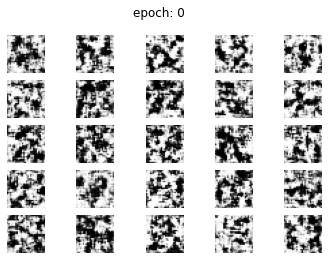

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.294506, acc.: 44.61%] [G loss: 0.941766]
2 [D loss: 0.080280, acc.: 60.29%] [G loss: 0.987959]
3 [D loss: 0.057924, acc.: 73.53%] [G loss: 1.230006]
4 [D loss: 0.076393, acc.: 69.12%] [G loss: 1.171263]
5 [D loss: 0.070758, acc.: 71.08%] [G loss: 1.317700]
6 [D loss: 0.069255, acc.: 75.00%] [G loss: 1.414582]
7 [D loss: 0.057673, acc.: 84.80%] [G loss: 1.658557]
8 [D loss: 0.051706, acc.: 88.24%] [G loss: 1.709048]
9 [D loss: 0.053389, acc.: 88.73%] [G loss: 1.614757]
10 [D loss: 0.061437, acc.: 78.43%] [G loss: 1.661991]
11 [D loss: 0.060796, acc.: 80.88%] [G loss: 1.567427]
12 [D loss: 0.057375, acc.: 80.88%] [G loss: 1.644397]
13 [D loss: 0.065353, acc.: 78.43%] [G loss: 1.605893]
14 [D loss: 0.051517, acc.: 85.78%] [G loss: 1.664506]
15 [D loss: 0.054796, acc.: 81.37%] [G loss: 1.655479]
16 [D loss: 0.046957, acc.: 87.25%] [G loss: 1.550857]
17 [D loss: 0.049549, acc.: 84.80%] [G loss: 1.463432]
18 [D loss: 0.052739, acc.: 81.37%] [G loss: 1.510801]
19 [D loss: 0.06295

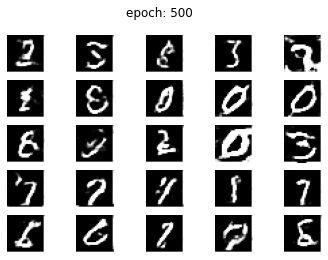

501 [D loss: 0.111972, acc.: 49.51%] [G loss: 0.530635]
502 [D loss: 0.102574, acc.: 52.45%] [G loss: 0.537259]
503 [D loss: 0.109596, acc.: 50.00%] [G loss: 0.525192]
504 [D loss: 0.108924, acc.: 50.00%] [G loss: 0.529206]
505 [D loss: 0.110751, acc.: 48.53%] [G loss: 0.523496]
506 [D loss: 0.106636, acc.: 51.47%] [G loss: 0.522244]
507 [D loss: 0.108238, acc.: 50.00%] [G loss: 0.525344]
508 [D loss: 0.105297, acc.: 51.96%] [G loss: 0.530428]
509 [D loss: 0.108805, acc.: 50.98%] [G loss: 0.540283]
510 [D loss: 0.107792, acc.: 50.00%] [G loss: 0.533067]
511 [D loss: 0.110964, acc.: 50.49%] [G loss: 0.530515]
512 [D loss: 0.110420, acc.: 49.51%] [G loss: 0.529175]
513 [D loss: 0.107571, acc.: 50.98%] [G loss: 0.542734]
514 [D loss: 0.105174, acc.: 50.00%] [G loss: 0.552600]
515 [D loss: 0.108980, acc.: 50.98%] [G loss: 0.536248]
516 [D loss: 0.108378, acc.: 50.00%] [G loss: 0.540799]
517 [D loss: 0.111349, acc.: 50.00%] [G loss: 0.532517]
518 [D loss: 0.105940, acc.: 49.51%] [G loss: 0.

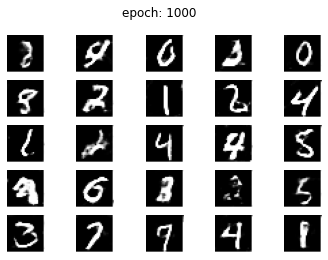

1001 [D loss: 0.108747, acc.: 50.49%] [G loss: 0.513678]
1002 [D loss: 0.111675, acc.: 49.51%] [G loss: 0.508277]
1003 [D loss: 0.111187, acc.: 48.04%] [G loss: 0.502989]
1004 [D loss: 0.110876, acc.: 50.00%] [G loss: 0.502823]
1005 [D loss: 0.106664, acc.: 50.98%] [G loss: 0.507067]
1006 [D loss: 0.108900, acc.: 49.51%] [G loss: 0.515305]
1007 [D loss: 0.107338, acc.: 50.49%] [G loss: 0.504479]
1008 [D loss: 0.109271, acc.: 49.02%] [G loss: 0.514665]
1009 [D loss: 0.112643, acc.: 49.02%] [G loss: 0.514937]
1010 [D loss: 0.108230, acc.: 49.02%] [G loss: 0.507029]
1011 [D loss: 0.107214, acc.: 50.49%] [G loss: 0.513495]
1012 [D loss: 0.110798, acc.: 50.49%] [G loss: 0.517475]
1013 [D loss: 0.113705, acc.: 48.53%] [G loss: 0.505622]
1014 [D loss: 0.108369, acc.: 48.53%] [G loss: 0.515730]
1015 [D loss: 0.104658, acc.: 50.98%] [G loss: 0.514920]
1016 [D loss: 0.107871, acc.: 50.00%] [G loss: 0.520798]
1017 [D loss: 0.110393, acc.: 51.47%] [G loss: 0.513865]
1018 [D loss: 0.108833, acc.: 5

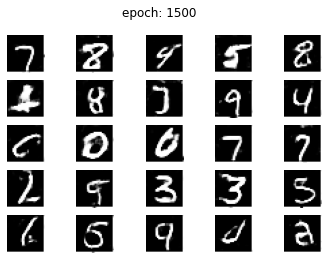

1501 [D loss: 0.109959, acc.: 50.49%] [G loss: 0.497500]
1502 [D loss: 0.113512, acc.: 50.98%] [G loss: 0.488824]
1503 [D loss: 0.110484, acc.: 48.53%] [G loss: 0.491531]
1504 [D loss: 0.105751, acc.: 49.51%] [G loss: 0.490731]
1505 [D loss: 0.112798, acc.: 49.51%] [G loss: 0.499733]
1506 [D loss: 0.107749, acc.: 52.94%] [G loss: 0.500264]
1507 [D loss: 0.105000, acc.: 50.98%] [G loss: 0.497078]
1508 [D loss: 0.113252, acc.: 50.00%] [G loss: 0.499759]
1509 [D loss: 0.107868, acc.: 51.47%] [G loss: 0.497619]
1510 [D loss: 0.113139, acc.: 49.51%] [G loss: 0.498429]
1511 [D loss: 0.115273, acc.: 47.55%] [G loss: 0.489185]
1512 [D loss: 0.111247, acc.: 50.49%] [G loss: 0.476669]
1513 [D loss: 0.111978, acc.: 50.49%] [G loss: 0.486626]
1514 [D loss: 0.110741, acc.: 49.02%] [G loss: 0.495606]
1515 [D loss: 0.113751, acc.: 49.51%] [G loss: 0.494197]
1516 [D loss: 0.116030, acc.: 49.51%] [G loss: 0.485421]
1517 [D loss: 0.108519, acc.: 50.49%] [G loss: 0.482057]
1518 [D loss: 0.114118, acc.: 4

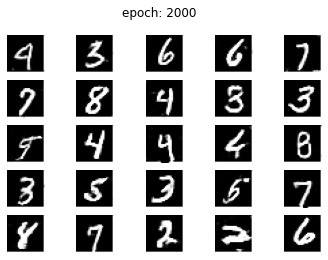

2001 [D loss: 0.111555, acc.: 50.49%] [G loss: 0.480294]
2002 [D loss: 0.116694, acc.: 49.51%] [G loss: 0.475566]
2003 [D loss: 0.114604, acc.: 50.00%] [G loss: 0.470046]
2004 [D loss: 0.114940, acc.: 49.51%] [G loss: 0.466069]
2005 [D loss: 0.108791, acc.: 49.02%] [G loss: 0.472141]
2006 [D loss: 0.111096, acc.: 49.51%] [G loss: 0.473287]
2007 [D loss: 0.110408, acc.: 50.00%] [G loss: 0.483937]
2008 [D loss: 0.110318, acc.: 50.00%] [G loss: 0.483263]
2009 [D loss: 0.111833, acc.: 49.51%] [G loss: 0.484139]
2010 [D loss: 0.111955, acc.: 50.00%] [G loss: 0.484469]
2011 [D loss: 0.113167, acc.: 49.51%] [G loss: 0.477424]
2012 [D loss: 0.112770, acc.: 50.00%] [G loss: 0.470731]
2013 [D loss: 0.110045, acc.: 50.49%] [G loss: 0.476955]
2014 [D loss: 0.110510, acc.: 50.00%] [G loss: 0.487959]
2015 [D loss: 0.111153, acc.: 50.49%] [G loss: 0.483686]
2016 [D loss: 0.113982, acc.: 50.00%] [G loss: 0.484202]
2017 [D loss: 0.111772, acc.: 50.49%] [G loss: 0.480884]
2018 [D loss: 0.108051, acc.: 4

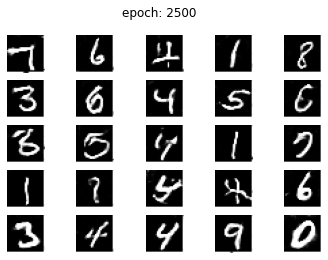

2501 [D loss: 0.111575, acc.: 50.00%] [G loss: 0.470574]
2502 [D loss: 0.111223, acc.: 50.00%] [G loss: 0.477237]
2503 [D loss: 0.111277, acc.: 49.51%] [G loss: 0.485810]
2504 [D loss: 0.107695, acc.: 49.51%] [G loss: 0.482872]
2505 [D loss: 0.110920, acc.: 50.49%] [G loss: 0.477343]
2506 [D loss: 0.110921, acc.: 50.49%] [G loss: 0.478770]
2507 [D loss: 0.114649, acc.: 49.51%] [G loss: 0.480404]
2508 [D loss: 0.110874, acc.: 49.51%] [G loss: 0.494103]
2509 [D loss: 0.108730, acc.: 50.98%] [G loss: 0.486186]
2510 [D loss: 0.114040, acc.: 49.51%] [G loss: 0.483831]
2511 [D loss: 0.111947, acc.: 49.02%] [G loss: 0.473290]
2512 [D loss: 0.112105, acc.: 50.49%] [G loss: 0.471199]
2513 [D loss: 0.110708, acc.: 50.49%] [G loss: 0.475585]
2514 [D loss: 0.113006, acc.: 49.51%] [G loss: 0.473237]
2515 [D loss: 0.111224, acc.: 50.49%] [G loss: 0.469205]
2516 [D loss: 0.112914, acc.: 50.00%] [G loss: 0.468797]
2517 [D loss: 0.111025, acc.: 50.00%] [G loss: 0.466445]
2518 [D loss: 0.112000, acc.: 5

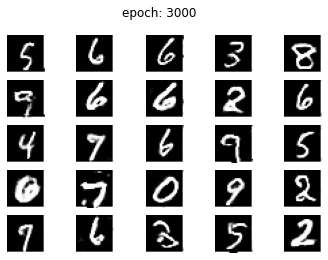

3001 [D loss: 0.110774, acc.: 50.98%] [G loss: 0.475533]
3002 [D loss: 0.109832, acc.: 50.49%] [G loss: 0.471631]
3003 [D loss: 0.113179, acc.: 49.51%] [G loss: 0.481024]
3004 [D loss: 0.108357, acc.: 50.00%] [G loss: 0.475287]
3005 [D loss: 0.112282, acc.: 49.02%] [G loss: 0.477122]
3006 [D loss: 0.110247, acc.: 50.49%] [G loss: 0.471883]
3007 [D loss: 0.109340, acc.: 49.51%] [G loss: 0.472938]
3008 [D loss: 0.109791, acc.: 48.53%] [G loss: 0.473311]
3009 [D loss: 0.112596, acc.: 50.98%] [G loss: 0.466526]
3010 [D loss: 0.115043, acc.: 49.51%] [G loss: 0.468594]
3011 [D loss: 0.111290, acc.: 49.51%] [G loss: 0.467073]
3012 [D loss: 0.112547, acc.: 50.00%] [G loss: 0.472430]
3013 [D loss: 0.111361, acc.: 49.51%] [G loss: 0.465694]
3014 [D loss: 0.113628, acc.: 49.51%] [G loss: 0.464718]
3015 [D loss: 0.112299, acc.: 50.00%] [G loss: 0.467868]
3016 [D loss: 0.110357, acc.: 50.00%] [G loss: 0.464117]
3017 [D loss: 0.113667, acc.: 50.49%] [G loss: 0.465652]
3018 [D loss: 0.111208, acc.: 4

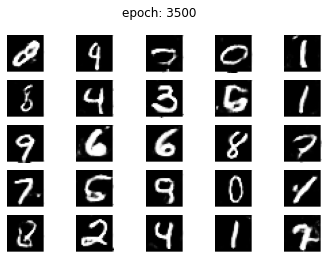

3501 [D loss: 0.110591, acc.: 50.00%] [G loss: 0.472197]
3502 [D loss: 0.111214, acc.: 49.02%] [G loss: 0.468111]
3503 [D loss: 0.111935, acc.: 50.49%] [G loss: 0.469330]
3504 [D loss: 0.110816, acc.: 50.49%] [G loss: 0.473647]
3505 [D loss: 0.110232, acc.: 50.00%] [G loss: 0.471302]
3506 [D loss: 0.112068, acc.: 50.00%] [G loss: 0.467706]
3507 [D loss: 0.107813, acc.: 50.00%] [G loss: 0.470147]
3508 [D loss: 0.112262, acc.: 50.00%] [G loss: 0.478494]
3509 [D loss: 0.114293, acc.: 49.51%] [G loss: 0.481286]
3510 [D loss: 0.113294, acc.: 49.51%] [G loss: 0.475266]
3511 [D loss: 0.111988, acc.: 49.51%] [G loss: 0.470939]
3512 [D loss: 0.109801, acc.: 49.51%] [G loss: 0.468744]
3513 [D loss: 0.108066, acc.: 50.00%] [G loss: 0.466082]
3514 [D loss: 0.109871, acc.: 50.98%] [G loss: 0.469166]
3515 [D loss: 0.110346, acc.: 50.00%] [G loss: 0.470392]
3516 [D loss: 0.110755, acc.: 50.00%] [G loss: 0.465989]
3517 [D loss: 0.111017, acc.: 50.00%] [G loss: 0.466138]
3518 [D loss: 0.109239, acc.: 5

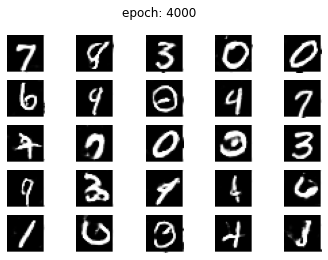

4001 [D loss: 0.110989, acc.: 50.49%] [G loss: 0.467208]
4002 [D loss: 0.110973, acc.: 50.00%] [G loss: 0.468515]
4003 [D loss: 0.112862, acc.: 50.49%] [G loss: 0.471222]
4004 [D loss: 0.109530, acc.: 50.00%] [G loss: 0.476266]
4005 [D loss: 0.108128, acc.: 50.00%] [G loss: 0.475062]
4006 [D loss: 0.111376, acc.: 50.00%] [G loss: 0.474498]
4007 [D loss: 0.108459, acc.: 50.00%] [G loss: 0.472649]
4008 [D loss: 0.112082, acc.: 50.49%] [G loss: 0.469810]
4009 [D loss: 0.108973, acc.: 50.98%] [G loss: 0.470673]
4010 [D loss: 0.110847, acc.: 49.51%] [G loss: 0.476817]
4011 [D loss: 0.110077, acc.: 50.00%] [G loss: 0.471259]
4012 [D loss: 0.108440, acc.: 50.00%] [G loss: 0.467384]
4013 [D loss: 0.107376, acc.: 50.00%] [G loss: 0.469125]
4014 [D loss: 0.112814, acc.: 50.49%] [G loss: 0.465524]
4015 [D loss: 0.113261, acc.: 50.49%] [G loss: 0.471147]
4016 [D loss: 0.109821, acc.: 50.00%] [G loss: 0.472012]
4017 [D loss: 0.111305, acc.: 50.00%] [G loss: 0.474336]
4018 [D loss: 0.110753, acc.: 4

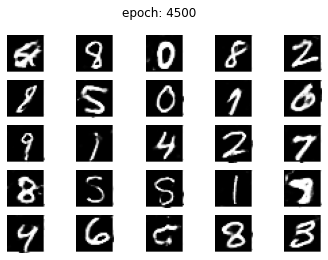

4501 [D loss: 0.108541, acc.: 50.00%] [G loss: 0.473009]
4502 [D loss: 0.111642, acc.: 50.00%] [G loss: 0.471465]
4503 [D loss: 0.113087, acc.: 50.00%] [G loss: 0.466012]
4504 [D loss: 0.109640, acc.: 50.00%] [G loss: 0.469831]
4505 [D loss: 0.108096, acc.: 50.00%] [G loss: 0.470157]
4506 [D loss: 0.108145, acc.: 50.00%] [G loss: 0.477290]
4507 [D loss: 0.108395, acc.: 49.51%] [G loss: 0.478884]
4508 [D loss: 0.109147, acc.: 49.51%] [G loss: 0.487568]
4509 [D loss: 0.110540, acc.: 49.02%] [G loss: 0.471978]
4510 [D loss: 0.109540, acc.: 49.51%] [G loss: 0.471878]
4511 [D loss: 0.113449, acc.: 49.51%] [G loss: 0.468721]
4512 [D loss: 0.111373, acc.: 50.00%] [G loss: 0.469302]
4513 [D loss: 0.106629, acc.: 49.51%] [G loss: 0.473481]
4514 [D loss: 0.110660, acc.: 50.00%] [G loss: 0.465728]
4515 [D loss: 0.107481, acc.: 50.00%] [G loss: 0.470727]
4516 [D loss: 0.110582, acc.: 50.00%] [G loss: 0.468853]
4517 [D loss: 0.108773, acc.: 50.00%] [G loss: 0.470850]
4518 [D loss: 0.110649, acc.: 5

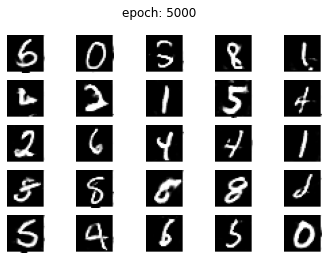

5001 [D loss: 0.111127, acc.: 50.49%] [G loss: 0.467001]
5002 [D loss: 0.107742, acc.: 50.00%] [G loss: 0.467192]
5003 [D loss: 0.106251, acc.: 50.00%] [G loss: 0.470041]
5004 [D loss: 0.109662, acc.: 50.00%] [G loss: 0.477091]
5005 [D loss: 0.108640, acc.: 50.00%] [G loss: 0.476480]
5006 [D loss: 0.110843, acc.: 50.00%] [G loss: 0.467894]
5007 [D loss: 0.107852, acc.: 50.00%] [G loss: 0.471011]
5008 [D loss: 0.109447, acc.: 50.00%] [G loss: 0.472593]
5009 [D loss: 0.110439, acc.: 49.51%] [G loss: 0.473451]
5010 [D loss: 0.110902, acc.: 49.51%] [G loss: 0.464871]
5011 [D loss: 0.107862, acc.: 50.00%] [G loss: 0.469917]
5012 [D loss: 0.106564, acc.: 50.00%] [G loss: 0.468983]
5013 [D loss: 0.110122, acc.: 49.51%] [G loss: 0.467761]
5014 [D loss: 0.108729, acc.: 50.00%] [G loss: 0.465607]
5015 [D loss: 0.110887, acc.: 50.00%] [G loss: 0.468267]
5016 [D loss: 0.110408, acc.: 50.00%] [G loss: 0.468377]
5017 [D loss: 0.109920, acc.: 50.00%] [G loss: 0.477258]
5018 [D loss: 0.108117, acc.: 5

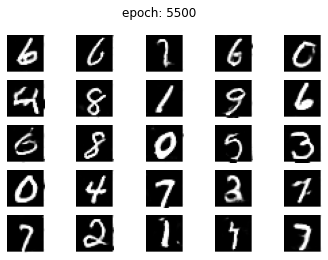

5501 [D loss: 0.108723, acc.: 50.00%] [G loss: 0.466312]
5502 [D loss: 0.111400, acc.: 49.51%] [G loss: 0.472313]
5503 [D loss: 0.110371, acc.: 50.00%] [G loss: 0.474778]
5504 [D loss: 0.109432, acc.: 50.00%] [G loss: 0.475256]
5505 [D loss: 0.108826, acc.: 50.00%] [G loss: 0.477900]
5506 [D loss: 0.109424, acc.: 50.00%] [G loss: 0.477372]
5507 [D loss: 0.109036, acc.: 50.00%] [G loss: 0.473945]
5508 [D loss: 0.110011, acc.: 50.00%] [G loss: 0.472204]
5509 [D loss: 0.107431, acc.: 49.51%] [G loss: 0.472309]
5510 [D loss: 0.110526, acc.: 50.00%] [G loss: 0.473425]
5511 [D loss: 0.104823, acc.: 50.00%] [G loss: 0.475993]
5512 [D loss: 0.111194, acc.: 49.51%] [G loss: 0.472035]
5513 [D loss: 0.109410, acc.: 50.00%] [G loss: 0.471721]
5514 [D loss: 0.109766, acc.: 50.00%] [G loss: 0.471287]
5515 [D loss: 0.107391, acc.: 50.00%] [G loss: 0.471063]
5516 [D loss: 0.111258, acc.: 50.00%] [G loss: 0.475168]
5517 [D loss: 0.107712, acc.: 50.00%] [G loss: 0.471213]
5518 [D loss: 0.107768, acc.: 5

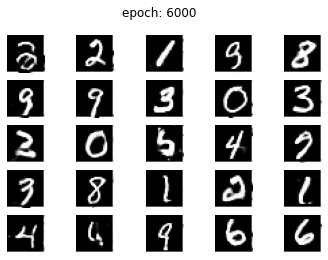

6001 [D loss: 0.108819, acc.: 49.51%] [G loss: 0.474966]
6002 [D loss: 0.106529, acc.: 50.00%] [G loss: 0.477126]
6003 [D loss: 0.103787, acc.: 50.49%] [G loss: 0.483505]
6004 [D loss: 0.109508, acc.: 50.00%] [G loss: 0.478964]
6005 [D loss: 0.105108, acc.: 50.00%] [G loss: 0.480238]
6006 [D loss: 0.110123, acc.: 49.51%] [G loss: 0.470093]
6007 [D loss: 0.111406, acc.: 50.00%] [G loss: 0.476022]
6008 [D loss: 0.107771, acc.: 50.00%] [G loss: 0.476319]
6009 [D loss: 0.107591, acc.: 50.00%] [G loss: 0.475422]
6010 [D loss: 0.108558, acc.: 50.49%] [G loss: 0.477967]
6011 [D loss: 0.113086, acc.: 50.00%] [G loss: 0.474996]
6012 [D loss: 0.108785, acc.: 50.00%] [G loss: 0.470692]
6013 [D loss: 0.107598, acc.: 50.00%] [G loss: 0.468134]
6014 [D loss: 0.106983, acc.: 50.00%] [G loss: 0.474057]
6015 [D loss: 0.108638, acc.: 50.00%] [G loss: 0.475525]
6016 [D loss: 0.108583, acc.: 50.00%] [G loss: 0.477549]
6017 [D loss: 0.109247, acc.: 50.00%] [G loss: 0.473281]
6018 [D loss: 0.110753, acc.: 5

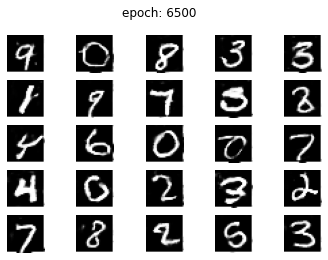

6501 [D loss: 0.109135, acc.: 50.00%] [G loss: 0.470959]
6502 [D loss: 0.106188, acc.: 50.00%] [G loss: 0.472173]
6503 [D loss: 0.106346, acc.: 50.00%] [G loss: 0.477162]
6504 [D loss: 0.108354, acc.: 49.51%] [G loss: 0.476326]
6505 [D loss: 0.108865, acc.: 50.00%] [G loss: 0.479278]
6506 [D loss: 0.108972, acc.: 50.00%] [G loss: 0.477344]
6507 [D loss: 0.107697, acc.: 50.00%] [G loss: 0.477356]
6508 [D loss: 0.109320, acc.: 50.00%] [G loss: 0.476144]
6509 [D loss: 0.108974, acc.: 50.00%] [G loss: 0.475847]
6510 [D loss: 0.106485, acc.: 50.00%] [G loss: 0.474887]
6511 [D loss: 0.108966, acc.: 50.00%] [G loss: 0.472565]
6512 [D loss: 0.109943, acc.: 50.00%] [G loss: 0.474101]
6513 [D loss: 0.107172, acc.: 50.00%] [G loss: 0.472643]
6514 [D loss: 0.107130, acc.: 50.00%] [G loss: 0.477715]
6515 [D loss: 0.110329, acc.: 50.00%] [G loss: 0.471974]
6516 [D loss: 0.108154, acc.: 50.00%] [G loss: 0.474724]
6517 [D loss: 0.106736, acc.: 50.00%] [G loss: 0.474839]
6518 [D loss: 0.108339, acc.: 5

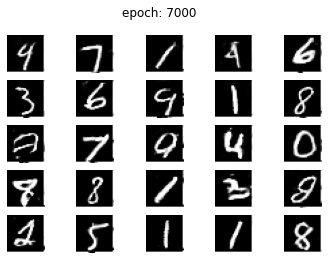

7001 [D loss: 0.104929, acc.: 50.00%] [G loss: 0.474973]
7002 [D loss: 0.108506, acc.: 50.00%] [G loss: 0.467588]
7003 [D loss: 0.106782, acc.: 50.00%] [G loss: 0.473039]
7004 [D loss: 0.107609, acc.: 50.00%] [G loss: 0.470858]
7005 [D loss: 0.109458, acc.: 50.00%] [G loss: 0.472295]
7006 [D loss: 0.110026, acc.: 50.00%] [G loss: 0.476195]
7007 [D loss: 0.108220, acc.: 50.49%] [G loss: 0.478180]
7008 [D loss: 0.108799, acc.: 50.00%] [G loss: 0.483075]
7009 [D loss: 0.109591, acc.: 50.00%] [G loss: 0.480253]
7010 [D loss: 0.106874, acc.: 50.00%] [G loss: 0.478266]
7011 [D loss: 0.108377, acc.: 50.00%] [G loss: 0.479058]
7012 [D loss: 0.105389, acc.: 50.00%] [G loss: 0.474796]
7013 [D loss: 0.109875, acc.: 50.00%] [G loss: 0.477464]
7014 [D loss: 0.107578, acc.: 50.00%] [G loss: 0.477299]
7015 [D loss: 0.109916, acc.: 50.00%] [G loss: 0.477152]
7016 [D loss: 0.108192, acc.: 50.00%] [G loss: 0.470876]
7017 [D loss: 0.106297, acc.: 50.00%] [G loss: 0.474926]
7018 [D loss: 0.107089, acc.: 5

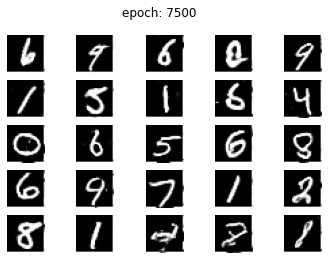

7501 [D loss: 0.109298, acc.: 50.00%] [G loss: 0.473561]
7502 [D loss: 0.106862, acc.: 50.49%] [G loss: 0.474779]
7503 [D loss: 0.107351, acc.: 50.00%] [G loss: 0.480004]
7504 [D loss: 0.107752, acc.: 50.00%] [G loss: 0.480100]
7505 [D loss: 0.106891, acc.: 50.00%] [G loss: 0.480286]
7506 [D loss: 0.106091, acc.: 50.00%] [G loss: 0.475959]
7507 [D loss: 0.108523, acc.: 50.00%] [G loss: 0.478526]
7508 [D loss: 0.107626, acc.: 50.00%] [G loss: 0.475971]
7509 [D loss: 0.110922, acc.: 50.00%] [G loss: 0.482040]
7510 [D loss: 0.105625, acc.: 50.00%] [G loss: 0.485343]
7511 [D loss: 0.108790, acc.: 50.00%] [G loss: 0.483338]
7512 [D loss: 0.107540, acc.: 50.00%] [G loss: 0.477141]
7513 [D loss: 0.106913, acc.: 50.00%] [G loss: 0.478449]
7514 [D loss: 0.106755, acc.: 50.00%] [G loss: 0.475579]
7515 [D loss: 0.109365, acc.: 50.00%] [G loss: 0.474705]
7516 [D loss: 0.107728, acc.: 50.49%] [G loss: 0.475343]
7517 [D loss: 0.104548, acc.: 50.49%] [G loss: 0.476364]
7518 [D loss: 0.109283, acc.: 5

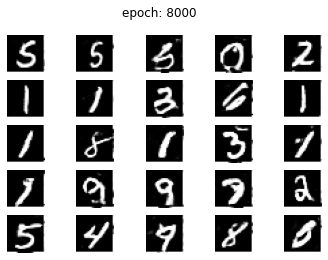

8001 [D loss: 0.110503, acc.: 50.00%] [G loss: 0.488947]
8002 [D loss: 0.107329, acc.: 50.00%] [G loss: 0.481587]
8003 [D loss: 0.106606, acc.: 50.00%] [G loss: 0.478496]
8004 [D loss: 0.108822, acc.: 50.00%] [G loss: 0.475187]
8005 [D loss: 0.110608, acc.: 50.00%] [G loss: 0.473352]
8006 [D loss: 0.108267, acc.: 50.00%] [G loss: 0.481762]
8007 [D loss: 0.107025, acc.: 50.00%] [G loss: 0.481058]
8008 [D loss: 0.108155, acc.: 50.00%] [G loss: 0.482854]
8009 [D loss: 0.106710, acc.: 50.00%] [G loss: 0.473167]
8010 [D loss: 0.107585, acc.: 50.00%] [G loss: 0.476940]
8011 [D loss: 0.107256, acc.: 50.00%] [G loss: 0.478689]
8012 [D loss: 0.105244, acc.: 49.51%] [G loss: 0.474717]
8013 [D loss: 0.106698, acc.: 50.00%] [G loss: 0.473840]
8014 [D loss: 0.107112, acc.: 50.00%] [G loss: 0.479892]
8015 [D loss: 0.109447, acc.: 50.00%] [G loss: 0.480655]
8016 [D loss: 0.105228, acc.: 50.00%] [G loss: 0.485067]
8017 [D loss: 0.108668, acc.: 49.51%] [G loss: 0.479606]
8018 [D loss: 0.107625, acc.: 5

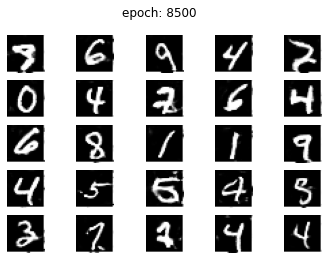

8501 [D loss: 0.105757, acc.: 50.00%] [G loss: 0.483323]
8502 [D loss: 0.107248, acc.: 50.00%] [G loss: 0.480058]
8503 [D loss: 0.105861, acc.: 50.49%] [G loss: 0.478262]
8504 [D loss: 0.105452, acc.: 50.00%] [G loss: 0.487338]
8505 [D loss: 0.108810, acc.: 49.51%] [G loss: 0.484435]
8506 [D loss: 0.107804, acc.: 50.00%] [G loss: 0.487790]
8507 [D loss: 0.106496, acc.: 50.00%] [G loss: 0.483101]
8508 [D loss: 0.106284, acc.: 50.00%] [G loss: 0.481555]
8509 [D loss: 0.105615, acc.: 50.00%] [G loss: 0.482975]
8510 [D loss: 0.107494, acc.: 50.00%] [G loss: 0.482617]
8511 [D loss: 0.105992, acc.: 50.00%] [G loss: 0.491382]
8512 [D loss: 0.103903, acc.: 50.00%] [G loss: 0.488355]
8513 [D loss: 0.106309, acc.: 50.00%] [G loss: 0.497983]
8514 [D loss: 0.103643, acc.: 50.98%] [G loss: 0.487701]
8515 [D loss: 0.106160, acc.: 50.49%] [G loss: 0.487925]
8516 [D loss: 0.106665, acc.: 50.00%] [G loss: 0.482532]
8517 [D loss: 0.107292, acc.: 50.00%] [G loss: 0.491186]
8518 [D loss: 0.105595, acc.: 5

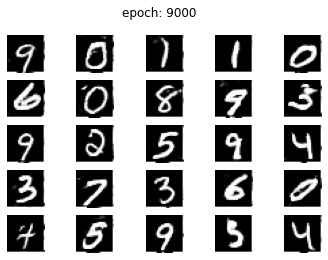

9001 [D loss: 0.109293, acc.: 50.00%] [G loss: 0.486059]
9002 [D loss: 0.106924, acc.: 50.00%] [G loss: 0.496240]
9003 [D loss: 0.104750, acc.: 50.49%] [G loss: 0.497902]
9004 [D loss: 0.105909, acc.: 50.00%] [G loss: 0.497346]
9005 [D loss: 0.105138, acc.: 50.00%] [G loss: 0.490432]
9006 [D loss: 0.104774, acc.: 50.49%] [G loss: 0.486286]
9007 [D loss: 0.107780, acc.: 50.00%] [G loss: 0.483293]
9008 [D loss: 0.106395, acc.: 50.49%] [G loss: 0.487013]
9009 [D loss: 0.110148, acc.: 50.49%] [G loss: 0.489255]
9010 [D loss: 0.108083, acc.: 49.51%] [G loss: 0.489231]
9011 [D loss: 0.104222, acc.: 50.00%] [G loss: 0.487632]
9012 [D loss: 0.109032, acc.: 50.00%] [G loss: 0.486699]
9013 [D loss: 0.108820, acc.: 50.98%] [G loss: 0.488064]
9014 [D loss: 0.109622, acc.: 50.00%] [G loss: 0.482194]
9015 [D loss: 0.107560, acc.: 50.00%] [G loss: 0.483354]
9016 [D loss: 0.107283, acc.: 50.00%] [G loss: 0.489092]
9017 [D loss: 0.105936, acc.: 50.00%] [G loss: 0.489763]
9018 [D loss: 0.108144, acc.: 5

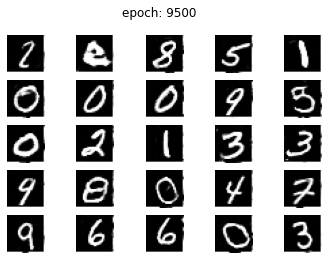

9501 [D loss: 0.105184, acc.: 50.49%] [G loss: 0.485676]
9502 [D loss: 0.106361, acc.: 50.49%] [G loss: 0.478426]
9503 [D loss: 0.109804, acc.: 50.49%] [G loss: 0.486188]
9504 [D loss: 0.109474, acc.: 50.49%] [G loss: 0.494188]
9505 [D loss: 0.103211, acc.: 50.00%] [G loss: 0.506345]
9506 [D loss: 0.103843, acc.: 51.47%] [G loss: 0.504773]
9507 [D loss: 0.102743, acc.: 50.98%] [G loss: 0.505546]
9508 [D loss: 0.105117, acc.: 51.47%] [G loss: 0.492131]
9509 [D loss: 0.105355, acc.: 52.45%] [G loss: 0.480378]
9510 [D loss: 0.111195, acc.: 49.51%] [G loss: 0.484854]
9511 [D loss: 0.105588, acc.: 50.49%] [G loss: 0.494232]
9512 [D loss: 0.103750, acc.: 50.00%] [G loss: 0.503613]
9513 [D loss: 0.104669, acc.: 49.51%] [G loss: 0.496664]
9514 [D loss: 0.105471, acc.: 50.49%] [G loss: 0.480794]
9515 [D loss: 0.106675, acc.: 50.00%] [G loss: 0.477304]
9516 [D loss: 0.107312, acc.: 50.00%] [G loss: 0.478942]
9517 [D loss: 0.106991, acc.: 50.00%] [G loss: 0.485399]
9518 [D loss: 0.107898, acc.: 5

In [ ]:
history = train(epochs=10000, batch_size=1024, show_interval=500)

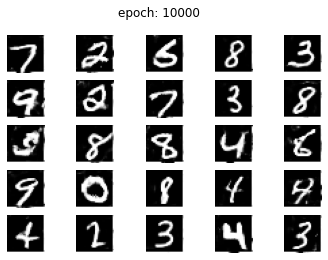

In [ ]:
show_imgs(10000)

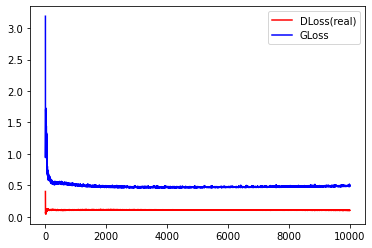

In [ ]:
ep = [i for i in range(10000)]
plt.plot(ep, np.array(D_L)[:,0], c='red', label='DLoss(real)')
plt.plot(ep, G_L, c='blue', label='GLoss')
plt.legend()
plt.show()